# CC

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav

In [3]:

def energie(signal, window_size):
    recouvrement = window_size // 2
    nb_fenetre = (len(signal) // recouvrement) - 1
    nrj = np.zeros(nb_fenetre)
    for i in range(nb_fenetre):
        debut_fenetre = i * recouvrement
        nrj[i] = np.sum(signal[debut_fenetre:debut_fenetre +
                        window_size] ** 2) / window_size
    return nrj


def zcr(signal, window_size):
    recouvrement = window_size // 2
    nb_fenetre = (len(signal) // recouvrement) - 1
    zcr = np.zeros(nb_fenetre)
    for i in range(nb_fenetre):
        debut_fenetre = i * recouvrement
        zcr[i] = np.sum(np.abs(np.sign(signal[debut_fenetre:debut_fenetre + window_size - 1]
                                       ) - np.sign(signal[debut_fenetre + 1:debut_fenetre + window_size]))) / (2 * window_size)
    return zcr


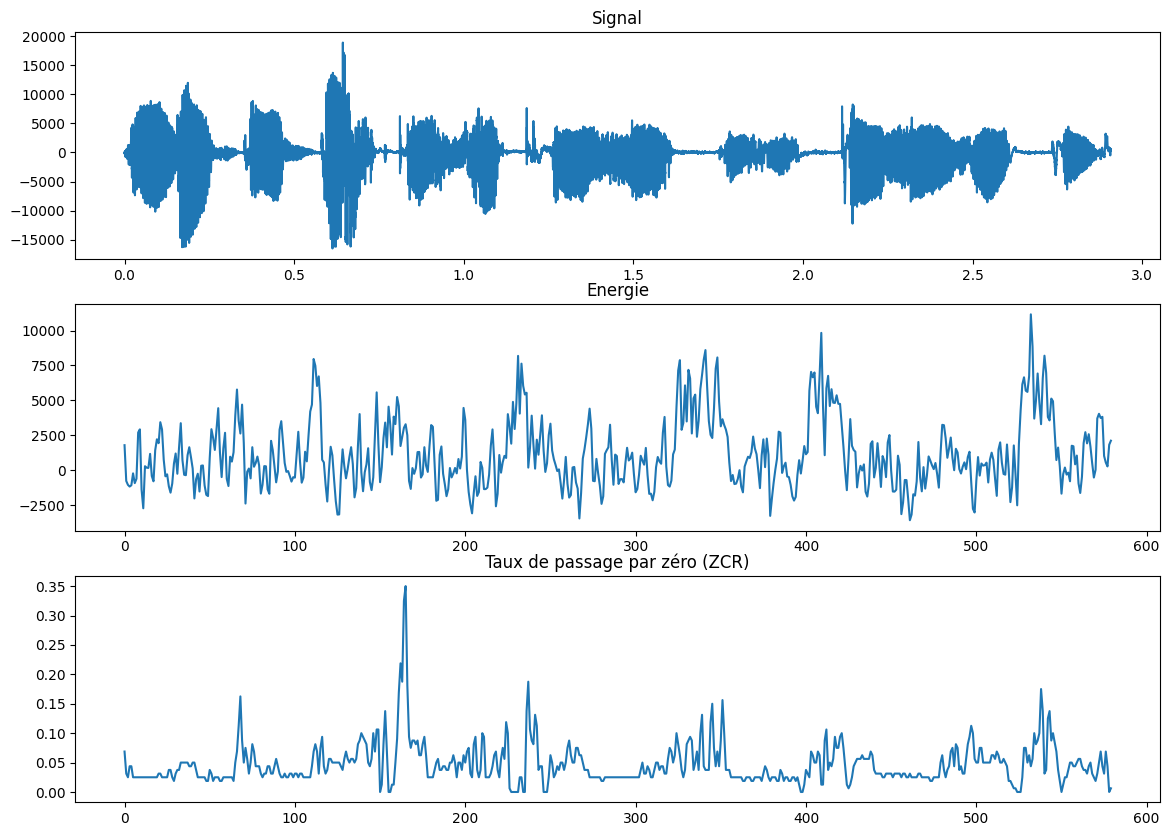

In [19]:

fs, signal = wav.read('assets/parole_examen.wav')

window_size = int(fs * 0.01)  # 10ms = 0.01s

fig, ax = plt.subplots(3, 1, figsize=(14, 10))

temps = np.arange(0, len(signal)) / fs

# Afficher le signal
ax[0].plot(temps, signal)
ax[0].set_title('Signal')

# Afficher l'énergie
ax[1].plot(energie(signal, window_size))
ax[1].set_title('Energie')

# Afficher le ZCR
ax[2].plot(zcr(signal, window_size))
ax[2].set_title('Taux de passage par zéro (ZCR)')

plt.savefig('assets/signal.jpg')
